<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# <font color='white' size='20'>**Overview**</font>

Find stuff about wine

### What are the components included in the dataset?

- **Fixed acidity:** 

    This is attributable to the non-volatile acids found in wine, such as tartaric, citric, or malic acid. These acids play a crucial role in balancing the wine's taste and imparting freshness.

- **Volatile acidity:** 

    Volatile acidity represents the portion of acidity in wine that can be detected through its aroma, in contrast to those acids that are perceptible through taste. High volatile acidity, often referred to as wine sourness, is a common wine defect.

- **Citric acid:** 

    Citric acid is an allowable additive in winemaking, regulated by OIV Resolution No. 23/2000. It serves three main purposes: adjusting wine acidity, wine fining, and filter cleaning to prevent fungal and mold contamination.

- **Residual sugar:** 

    Residual sugar refers to the grape sugar that remains unfermented and retains its sweetness in the wine.

- **Chlorides:** 

    The mineral content in wine, including chlorides, sulfates, sulfites, and metal cations (e.g., potassium, sodium, magnesium), significantly influences its taste profile, including salinity or "sapidità." These constituents are influenced by factors like climate, oenological practices, storage, and aging conditions.

- **Free sulfur dioxide and total sulfur dioxide:** 

    Sulfur dioxide, commonly referred to as SO2, is employed as a preservative in wine due to its antioxidant and antimicrobial properties. Molecular SO2 acts as a crucial antimicrobial agent, preventing spoilage caused by microorganisms, including wild yeast.

- **Density:** 

    Wine's density can either exceed or fall below that of water. It primarily depends on the concentration of alcohol and sugar. Generally, white, rosé, and red wines have lower densities at 20°C than 998.3 kg/m³.

- **pH:** 

    pH is a measure of wine's acidity level, with the ideal range falling between 2.9 and 4.2. Lower pH values indicate higher acidity, while higher pH values signify lower acidity.

- **Sulfates:** 

    Sulfates are naturally produced during yeast fermentation of wine sugars into alcohol, and the presence of sulfites in wine is negligible.

- **Alcohol:** 

    The alcohol content in wine varies based on factors such as grape variety, sugar content in the grapes, production techniques, and growing conditions. Wine alcohol content can range from 4.5% to 22%, depending on the wine category.

- **Quality:** 

    Quality is a target variable in the dataset, indicating the overall quality or rating of the wine.

<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# <font color='white' size='20'><i>**Plan**</i></font> → Acquire → Prepare → Explore → Model → Deliver

- **Notebook matched presentation (2 pts)**

Notebook was clean and relevant such that what was talked about what easy to see in the notebook, and what was in the notebook was relevant information that was included in the presentation.

- **Considered audience/setting (2 pts)**

You clearly considered the audience and setting in which the presentation was delivered. The language was professional, volume and speed of talk was appropriate, as was level of depth, and it was easy to follow you throughout the presentation

- **Conclusion with summary (2 pts)**

Your presentation concluded with a summary of what was found, recommendations, and next steps.

- **Under 5 minutes (2 pts)**

Adequate time for each section

---

### Check columns functions

In [2]:
import matplotlib.pyplot as plt
import pandas as pd


def check_columns(df, reports=False, graphs=False):
    """
    This function takes a pandas dataframe as input and returns
    a dataframe with information about each column in the dataframe. For
    each column, it returns the column name, the number of
    unique values in the column, the unique values themselves,
    the number of null values in the column, the proportion of null values,
    the data type of the column, and the range of the column if it is float or int. The resulting dataframe is sorted by the
    'Number of Unique Values' column in ascending order.

    Args:
    - df: pandas dataframe

    Returns:
    - pandas dataframe
    """
    print(f"Total rows: {df.shape[0]}")
    print(f"Total columns: {df.shape[1]}")
    if reports == True:
        describe = df.describe().round(2)
        pd.DataFrame(describe)
        print(describe)
    if graphs == True:
        df.hist(bins=20, figsize=(10, 10))
        plt.show()
    data = []
    # Loop through each column in the dataframe
    for column in df.columns:
        # Append the column name, number of unique values, unique values, number of null values, proportion of null values, and data type to the data list
        if df[column].dtype in ["float64", "int64"]:
            data.append(
                [
                    column,
                    df[column].dtype,
                    df[column].nunique(),
                    df[column].isna().sum(),
                    df[column].isna().mean().round(5),
                    df[column].unique(),
                    df[column].describe()[["min", "max", "mean"]].values,
                ]
            )
        else:
            data.append(
                [
                    column,
                    df[column].dtype,
                    df[column].nunique(),
                    df[column].isna().sum(),
                    df[column].isna().mean().round(5),
                    df[column].unique(),
                    None,
                ]
            )
    # Create a pandas dataframe from the data list, with column names 'Column Name', 'Number of Unique Values', 'Unique Values', 'Number of Null Values', 'Proportion of Null Values', 'dtype', and 'Range' (if column is float or int)
    # Sort the resulting dataframe by the 'Number of Unique Values' column in ascending order
    return pd.DataFrame(
        data,
        columns=[
            "col_name",
            "dtype",
            "num_unique",
            "num_null",
            "pct_null",
            "unique_values",
            "range (min, max, mean)",
        ],
    )

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# Plan → <font color='white' size='20'><i>**Acquire**</i></font> → Prepare → Explore → Model → Deliver

In [5]:
import os
import pandas as pd

# Check if wine.csv exists
if os.path.exists("wine.csv"):
    # If it exists, open the file as a DataFrame
    df = pd.read_csv("wine.csv")
else:
    # If it doesn't exist, import the two files and create wine.csv
    red = pd.read_csv("winequality_red.csv")
    white = pd.read_csv("winequality_white.csv")
    # Create a seperator to differentiate
    red["is_red"] = 1
    white["is_red"] = 0
    # Merge them and cache
    df = pd.concat([red, white], axis=0)
    df.to_csv("wine.csv", index=False)
    df = pd.read_csv("wine.csv")

<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# Plan → Acquire → <font color='white' size='20'><i>**Prepare**</i></font> → Explore → Model → Deliver

- **Functions used with md documentation. (2 pts)**

You called the functions from modules that you created to wrangle data in your report, and you included, in your final notebook, a markdown cell, explaining the steps you took to prepare the data and why.

- **Sound handling of missing values (2 pts)**

You handled missing values by imputing or removing them in a logical and communicated way. You correctly handled missing values using a sound logic that was communicated via markdown documentation. You correctly used either the training data or the entire dataset to impute (given your method(s) for filling missing values).

- **Scaling performed correctly (3 pts)**

You correctly scaled your data, and used scaled data in clustering and regression.

- **Three Samples Before Exploring (3 pts)**

Your data was split into three samples before exploring the interaction of variables, imputing, scaling, or running feature elimination/selection algorithms.

- **RandomState set (1 pt)**

Your split is reproducible because you set the random state to a seed.

- **Modules with functions using docstrings. (3 pts)**

Module(s) with functions for acquiring and preparing the data are created. Functions include useful docstrings (beyond the docstrings of functions written and shared by instructors)

---

Total rows: 6497
Total columns: 13
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count        6497.00           6497.00      6497.00         6497.00   
mean            7.22              0.34         0.32            5.44   
std             1.30              0.16         0.15            4.76   
min             3.80              0.08         0.00            0.60   
25%             6.40              0.23         0.25            1.80   
50%             7.00              0.29         0.31            3.00   
75%             7.70              0.40         0.39            8.10   
max            15.90              1.58         1.66           65.80   

       chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density       ph  \
count    6497.00              6497.00               6497.00  6497.00  6497.00   
mean        0.06                30.53                115.74     0.99     3.22   
std         0.04                17.75                 56.52     0.00     0.16   
m

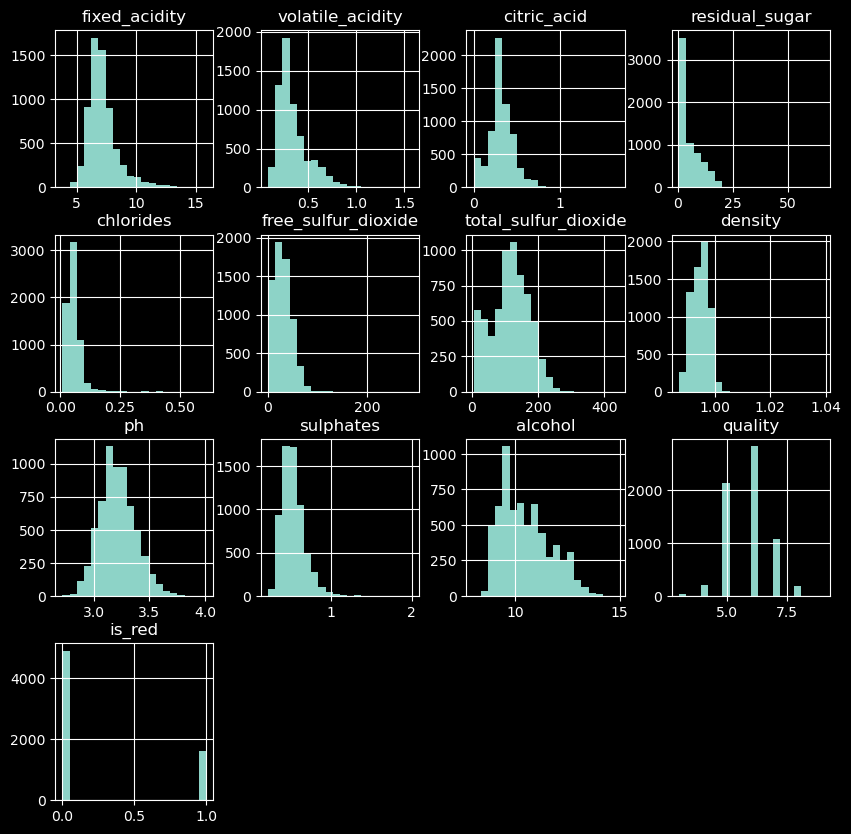

,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,fixed_acidity,float64,106,0,0.0,"[7.4, 7.8, 11.2, 7.9, 7.3, 7.5, 6.7, 5.6, 8.9,...","[3.8, 15.9, 7.215307064799139]"
1,volatile_acidity,float64,187,0,0.0,"[0.7, 0.88, 0.76, 0.28, 0.66, 0.6, 0.65, 0.58,...","[0.08, 1.58, 0.3396659996921656]"
2,citric_acid,float64,89,0,0.0,"[0.0, 0.04, 0.56, 0.06, 0.02, 0.36, 0.08, 0.29...","[0.0, 1.66, 0.3186332153301524]"
3,residual_sugar,float64,316,0,0.0,"[1.9, 2.6, 2.3, 1.8, 1.6, 1.2, 2.0, 6.1, 3.8, ...","[0.6, 65.8, 5.443235339387409]"
4,chlorides,float64,214,0,0.0,"[0.076, 0.098, 0.092, 0.075, 0.069, 0.065, 0.0...","[0.009, 0.611, 0.05603386178236109]"
5,free_sulfur_dioxide,float64,135,0,0.0,"[11.0, 25.0, 15.0, 17.0, 13.0, 9.0, 16.0, 52.0...","[1.0, 289.0, 30.525319378174544]"
6,total_sulfur_dioxide,float64,276,0,0.0,"[34.0, 67.0, 54.0, 60.0, 40.0, 59.0, 21.0, 18....","[6.0, 440.0, 115.7445744189626]"
7,density,float64,998,0,0.0,"[0.9978, 0.9968, 0.997, 0.998, 0.9964, 0.9946,...","[0.98711, 1.03898, 0.9946966338309989]"
8,ph,float64,108,0,0.0,"[3.51, 3.2, 3.26, 3.16, 3.3, 3.39, 3.36, 3.35,...","[2.72, 4.01, 3.2185008465445586]"
9,sulphates,float64,111,0,0.0,"[0.56, 0.68, 0.65, 0.58, 0.46, 0.47, 0.57, 0.8...","[0.22, 2.0, 0.5312682776666154]"


In [6]:
# Univariate exploration (before split)

check_columns(df, reports=True, graphs=True)

In [5]:
def box_plotter(df):
    """
    Generates a box plot for all columns in a dataframe using matplotlib.
    """
    for col in df.columns:
        try:
            plt.figure(figsize=(12, 1))
            plt.boxplot(df[col], vert=False)
            plt.title(col)
            plt.show()
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            print(
                f"Number of results in lower quartile: {len(df[df[col] < lower_bound])} ({(len(df[df[col] < lower_bound])/len(df))*100:.2f}%)"
            )
            print(
                f"Number of results in inner quartile: {len(df[(df[col] >= lower_bound) & (df[col] <= upper_bound)])} ({(len(df[(df[col] >= lower_bound) & (df[col] <= upper_bound)])/len(df))*100:.2f}%)"
            )
            print(
                f"Number of results in upper quartile: {len(df[df[col] > upper_bound])} ({(len(df[df[col] > upper_bound])/len(df))*100:.2f}%)"
            )
        except:
            print(
                f"Error: Could not generate box plot for column {col}. Skipping to next column..."
            )
            plt.close()
            continue

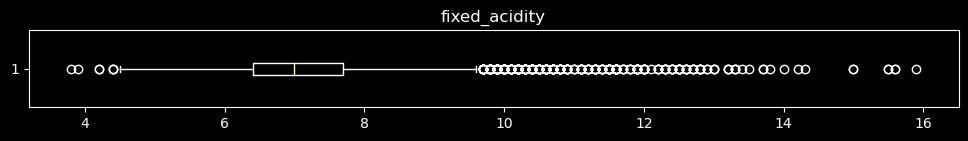

Number of results in lower quartile: 7 (0.11%)
Number of results in inner quartile: 6140 (94.51%)
Number of results in upper quartile: 350 (5.39%)


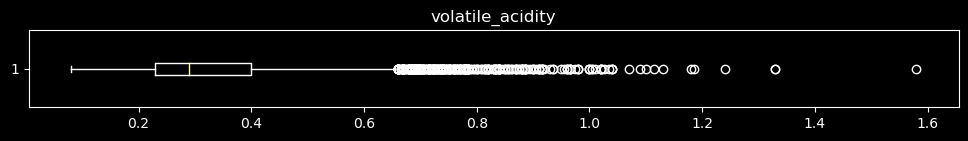

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 6120 (94.20%)
Number of results in upper quartile: 377 (5.80%)


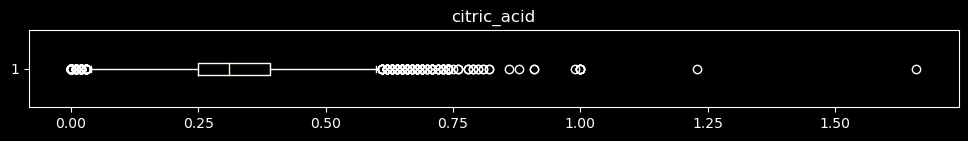

Number of results in lower quartile: 279 (4.29%)
Number of results in inner quartile: 5988 (92.17%)
Number of results in upper quartile: 230 (3.54%)


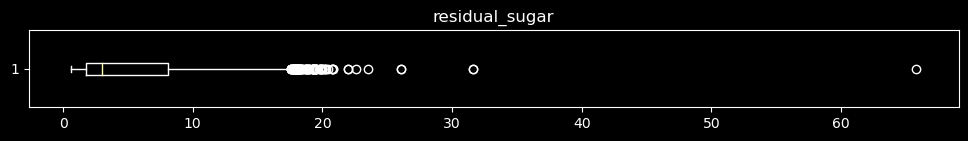

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 6379 (98.18%)
Number of results in upper quartile: 118 (1.82%)


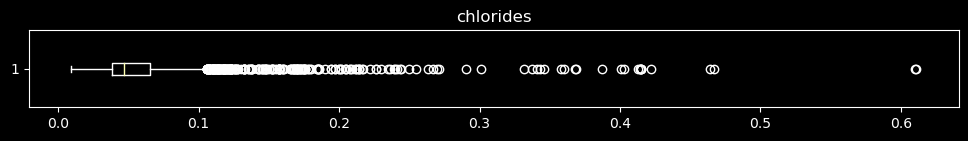

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 6211 (95.60%)
Number of results in upper quartile: 286 (4.40%)


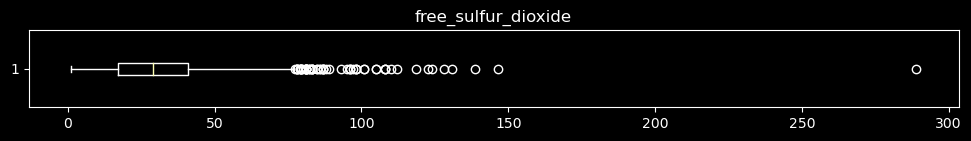

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 6435 (99.05%)
Number of results in upper quartile: 62 (0.95%)


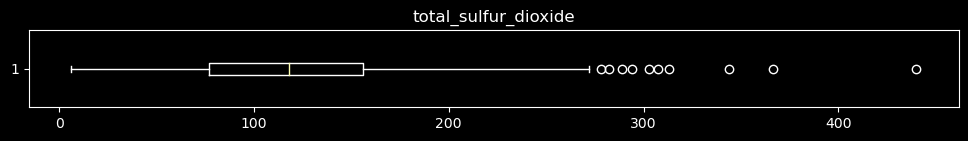

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 6487 (99.85%)
Number of results in upper quartile: 10 (0.15%)


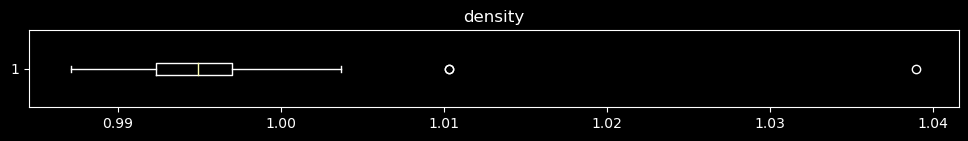

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 6494 (99.95%)
Number of results in upper quartile: 3 (0.05%)


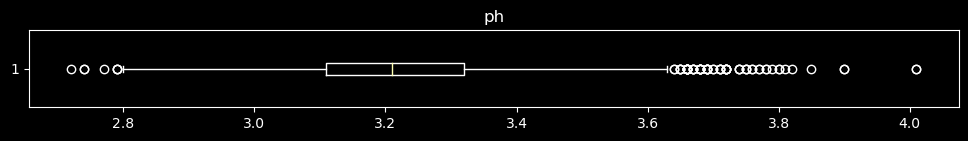

Number of results in lower quartile: 7 (0.11%)
Number of results in inner quartile: 6424 (98.88%)
Number of results in upper quartile: 66 (1.02%)


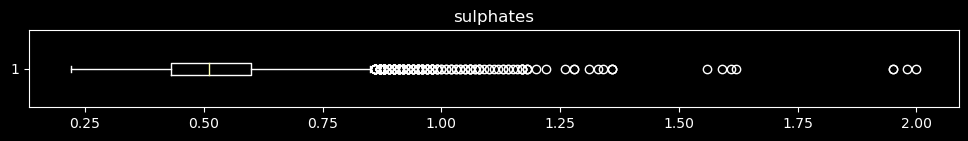

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 6306 (97.06%)
Number of results in upper quartile: 191 (2.94%)


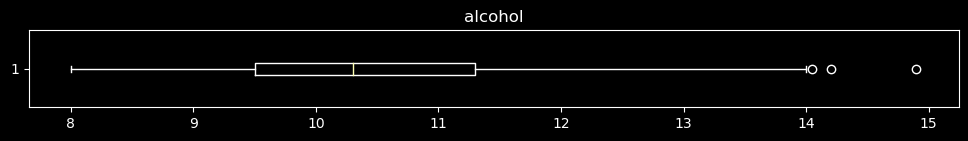

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 6494 (99.95%)
Number of results in upper quartile: 3 (0.05%)


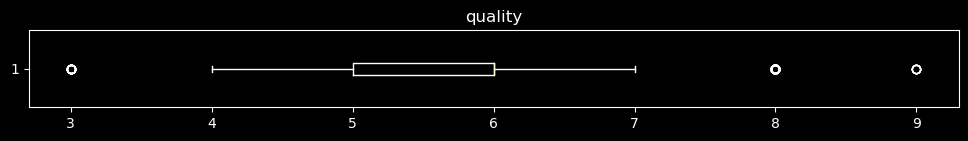

Number of results in lower quartile: 30 (0.46%)
Number of results in inner quartile: 6269 (96.49%)
Number of results in upper quartile: 198 (3.05%)


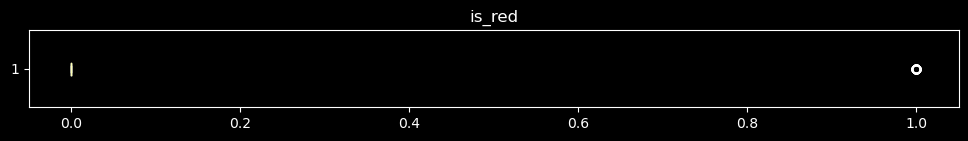

Number of results in lower quartile: 0 (0.00%)
Number of results in inner quartile: 4898 (75.39%)
Number of results in upper quartile: 1599 (24.61%)


In [6]:
box_plotter(df)

##### Split Data Function

In [7]:
def split_data(df, random_state=123):
    """Split into train, validate, test with a 60% train, 20% validate, 20% test"""
    train_validate, test = train_test_split(df, test_size=0.2, random_state=123)
    train, validate = train_test_split(train_validate, test_size=0.25, random_state=123)

    print(f"train: {len(train)} ({round(len(train)/len(df)*100)}% of {len(df)})")
    print(
        f"validate: {len(validate)} ({round(len(validate)/len(df)*100)}% of {len(df)})"
    )
    print(f"test: {len(test)} ({round(len(test)/len(df)*100)}% of {len(df)})")
    return train, validate, test

In [8]:
# Split for multivariate exploration

train, validate, test = split_data(df)

train: 3897 (60% of 6497)
validate: 1300 (20% of 6497)
test: 1300 (20% of 6497)


<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# Plan → Acquire → Prepare → <font color='white' size='20'><i>**Explore**</i></font> → Model → Deliver

- **Viz's/tests wrapped in a formed Q & A (6 pts)**

You called out at least four of the questions you asked of the data and provided a clear answer using natural language in markdown cells in your final report.

- **5-7 Vizs (5 pts)**

Between five and seven visualizations included. Included visualizations should be tied to specific statements/questions and takeaways/answers (with or without a statistical test) or set the context for the target or other key variable. Including more than seven visualizations in the final report typically indicates some are extraneous.

- **2 accurate tests included (5 pts)**

You correctly utilize at least two statistical tests (correct variables, conclusions drawn, no assumptions violated, and proper conclusions reached).

- **3 clustering models + explored (6 pts)**

You developed 3 clustering models and explored the relationship of those clusters to the target variable.

- **Analysis Summary + Features (6 pts)**

Summary of analysis includes key takeaways from the questions answered in explore, and documentation of the features that will be tried out in modeling and why, and which features will not move forward and why. Well done!

---

### Graphs

<Axes: >

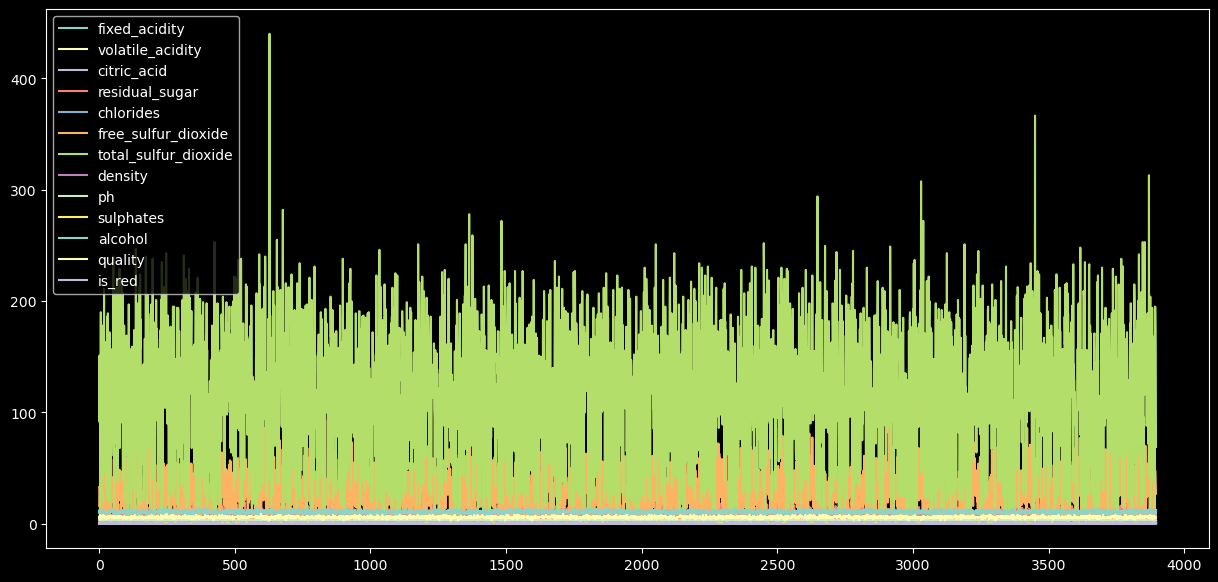

In [9]:
# reset the index on train for plotting
train = train.reset_index(drop=True)

train.plot(figsize=(15, 7))

In [10]:
avg_by_quality = train.groupby("quality").mean()
avg_by_quality

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,is_red
quality,,,,,,,,,,,,
3,7.700000,0.488421,0.270526,5.447368,0.068789,46.763158,142.842105,0.995636,3.251053,0.491053,10.163158,0.263158
4,7.389256,0.449835,0.291240,4.268595,0.062992,21.462810,103.595041,0.994892,3.215950,0.511074,10.157851,0.247934
5,7.342174,0.390251,0.310062,5.847841,0.065111,30.441789,120.560139,0.995870,3.210571,0.526045,9.842573,0.323053
6,7.205575,0.312887,0.325622,5.656246,0.054053,31.565382,116.385581,0.994627,3.218295,0.532055,10.570880,0.223584
7,7.128175,0.285706,0.332317,4.810159,0.045203,30.239683,107.994444,0.993154,3.229048,0.547048,11.389180,0.179365
8,6.786842,0.293114,0.341053,5.460965,0.041061,33.508772,115.815789,0.992519,3.227368,0.504912,11.669298,0.096491
9,7.700000,0.296667,0.426667,5.666667,0.028333,38.666667,118.666667,0.992367,3.283333,0.413333,12.000000,0.000000


<Axes: xlabel='quality'>

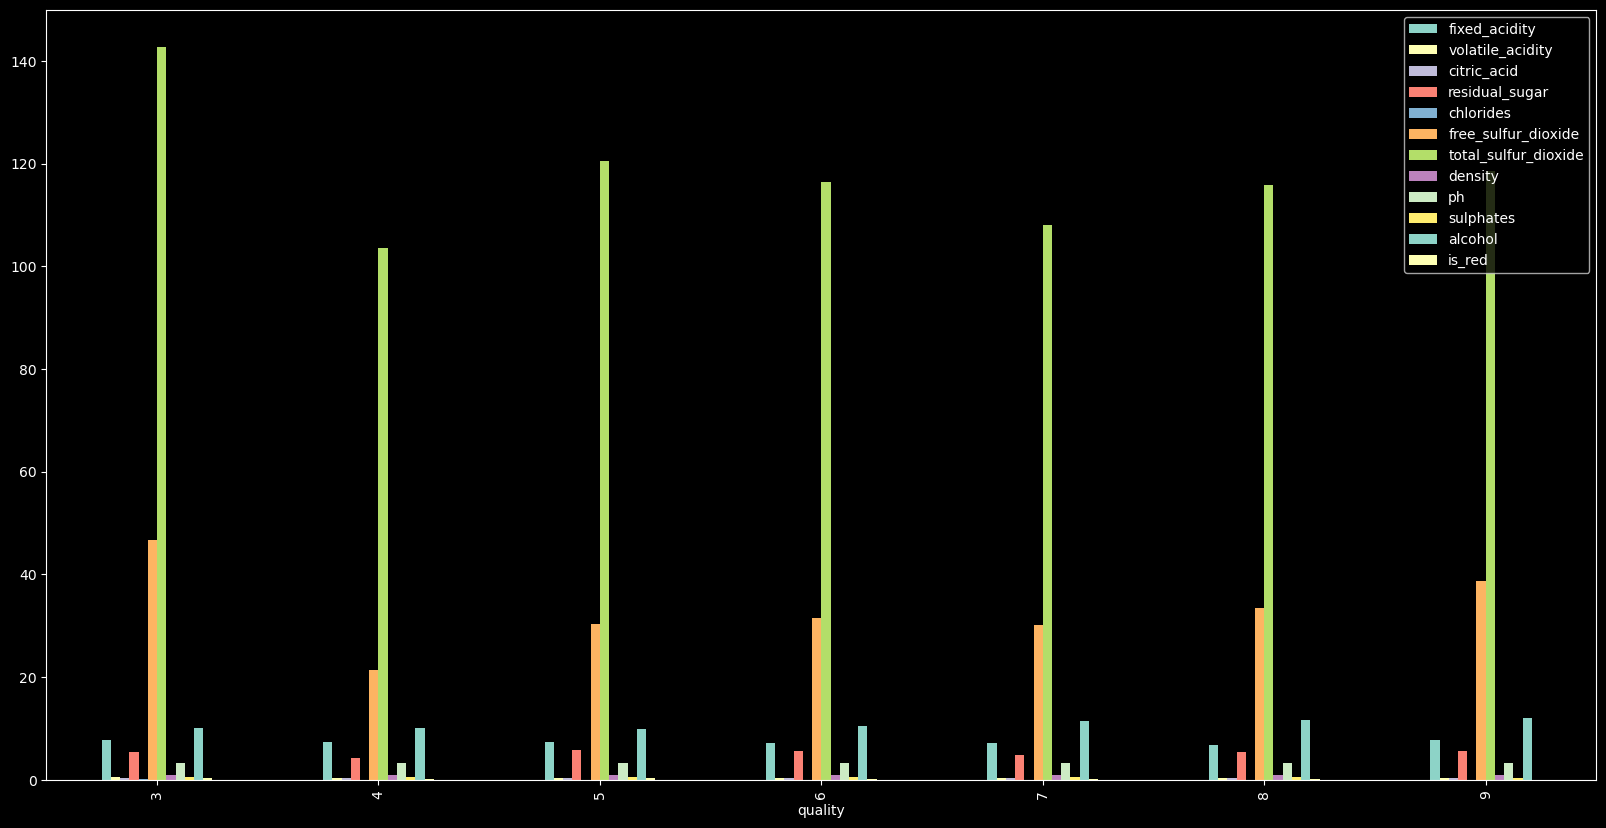

In [11]:
avg_by_quality.plot(kind="bar", figsize=(20, 10))

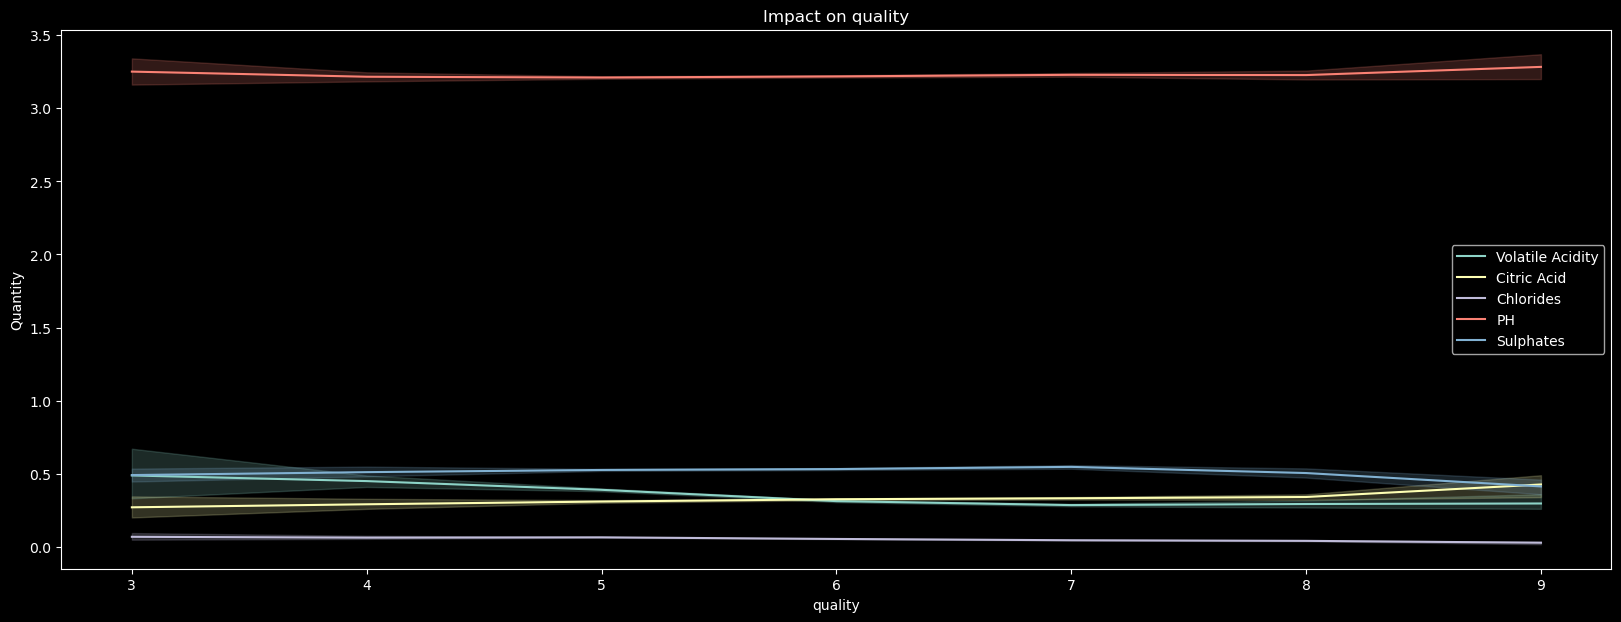

In [12]:
plt.figure(figsize=(20, 7))
sns.lineplot(data=train, x="quality", y="volatile_acidity", label="Volatile Acidity")
sns.lineplot(data=train, x="quality", y="citric_acid", label="Citric Acid")
sns.lineplot(data=train, x="quality", y="chlorides", label="Chlorides")
sns.lineplot(data=train, x="quality", y="ph", label="PH")
sns.lineplot(data=train, x="quality", y="sulphates", label="Sulphates")
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

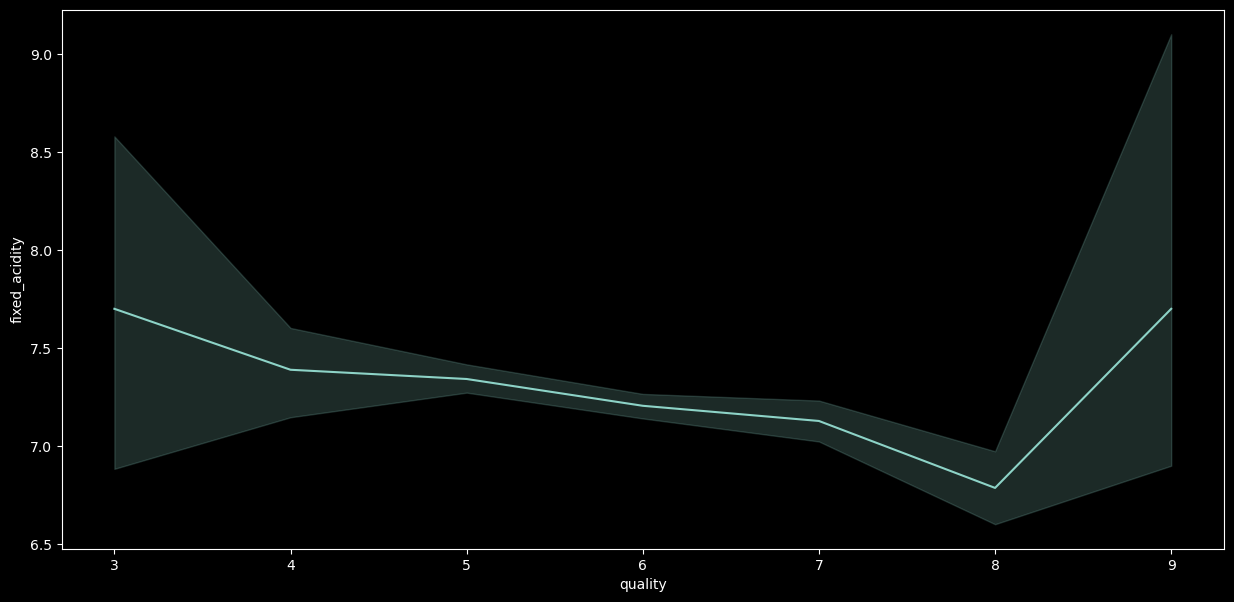

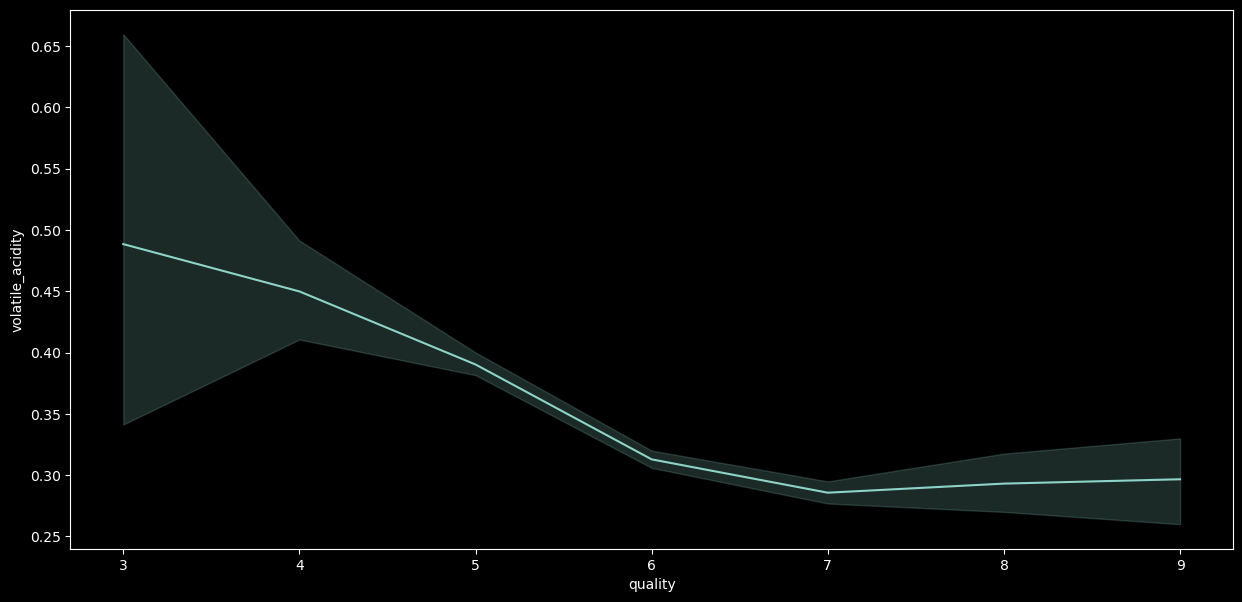

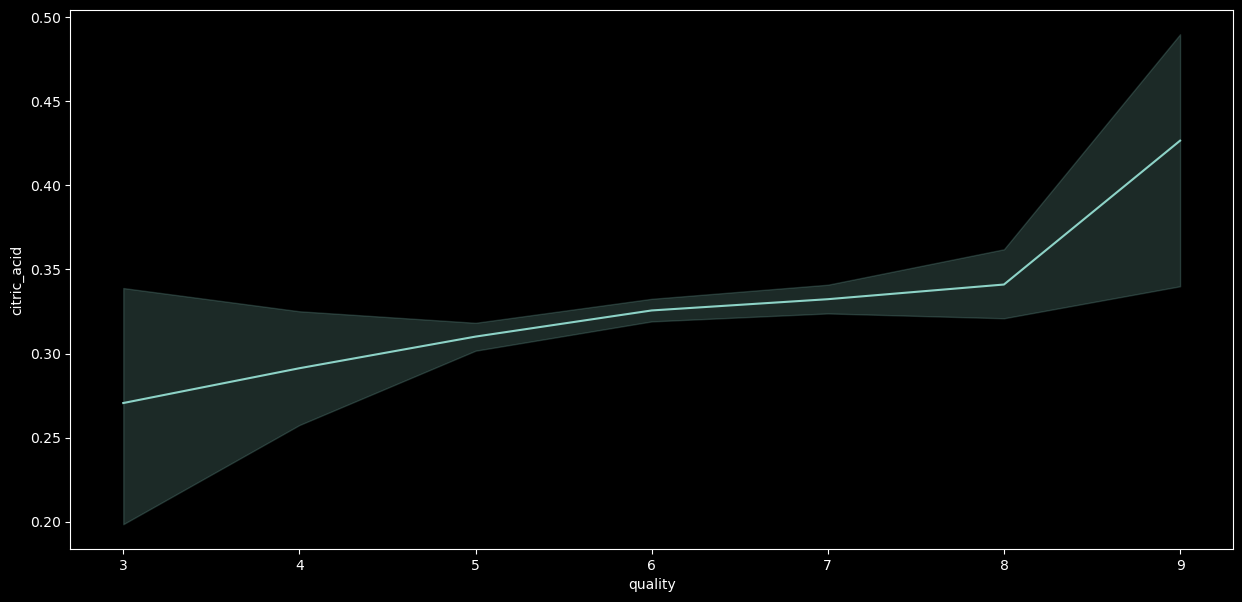

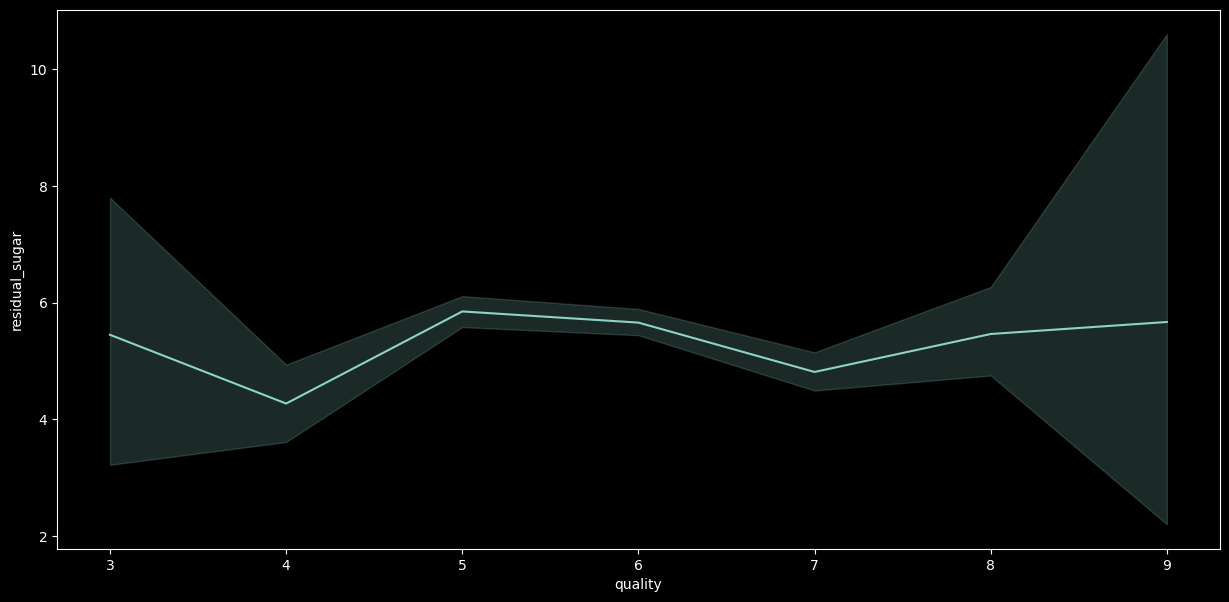

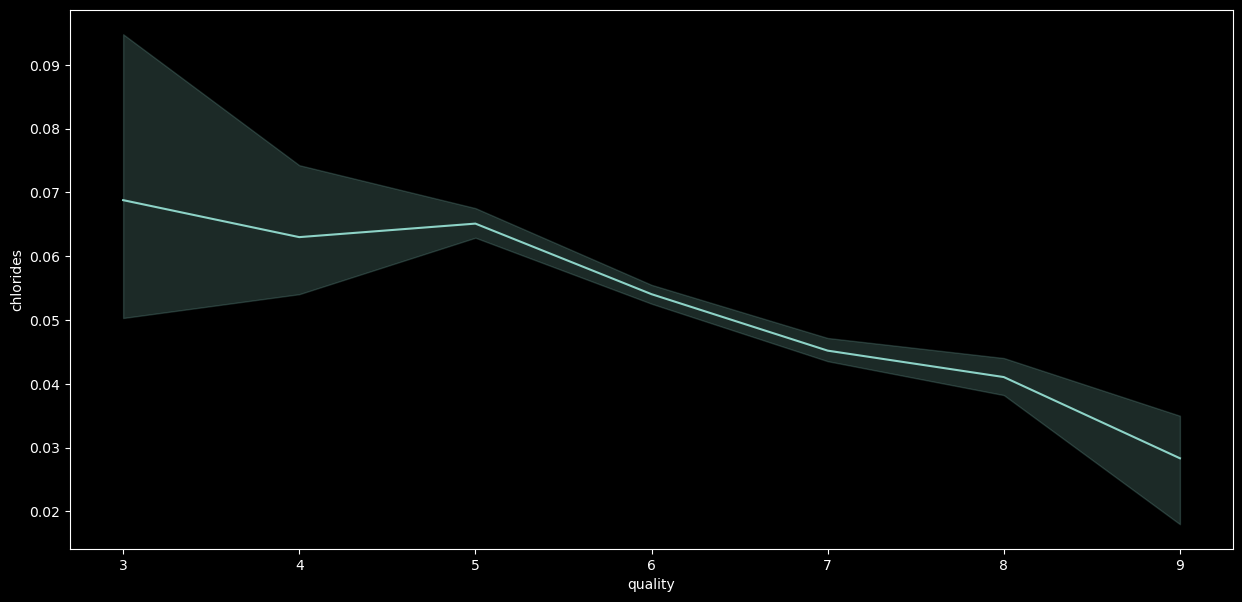

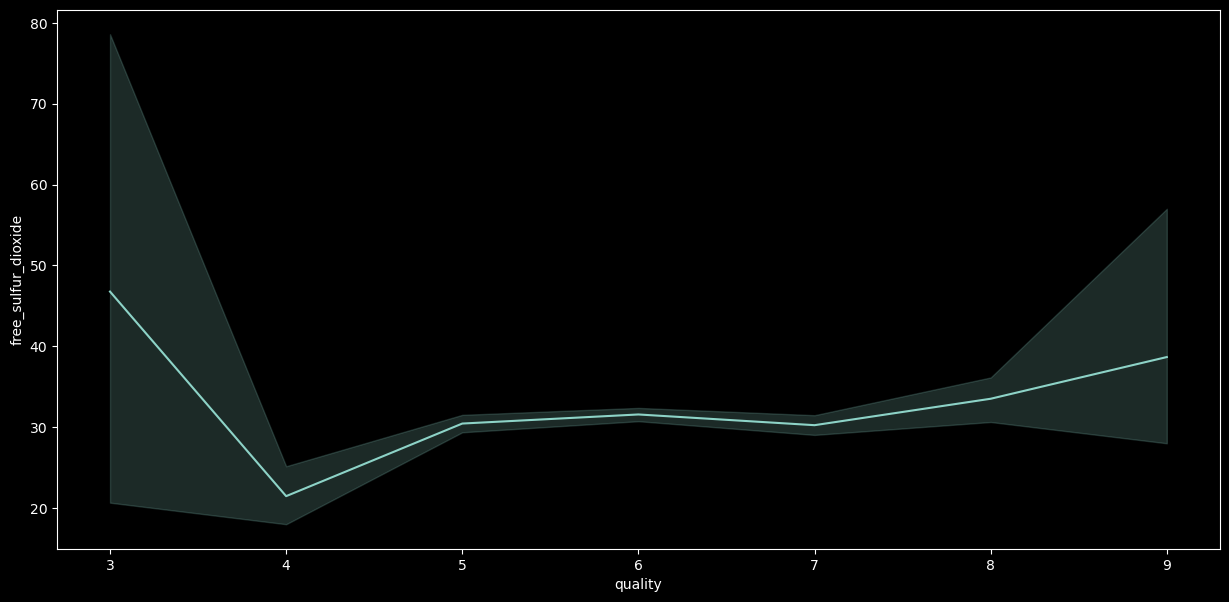

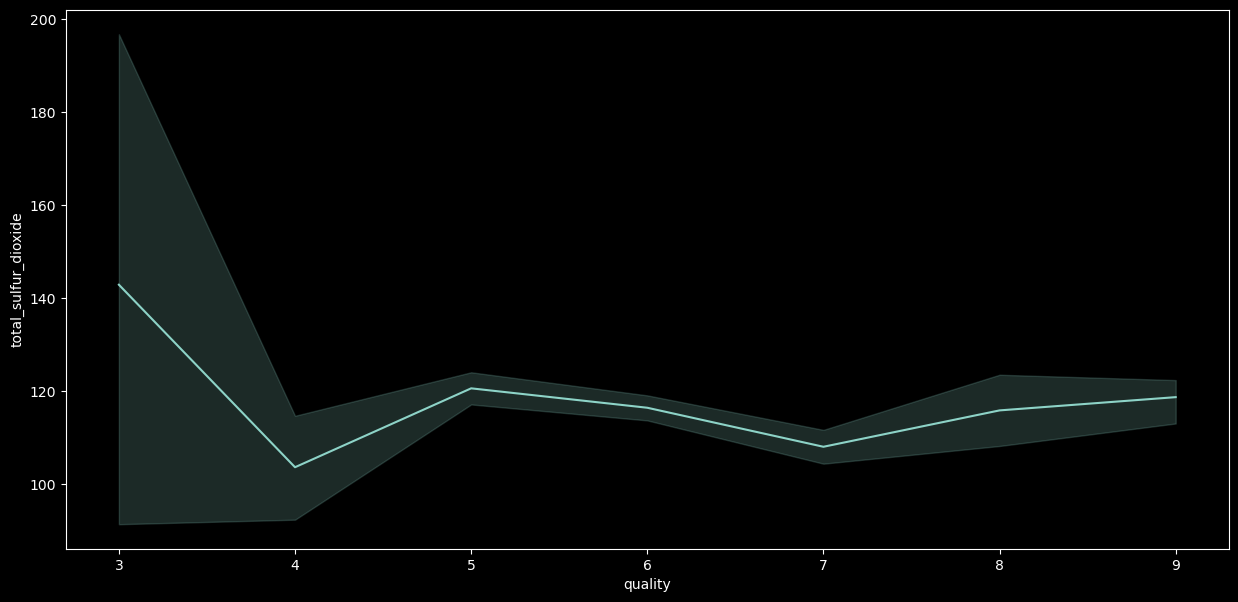

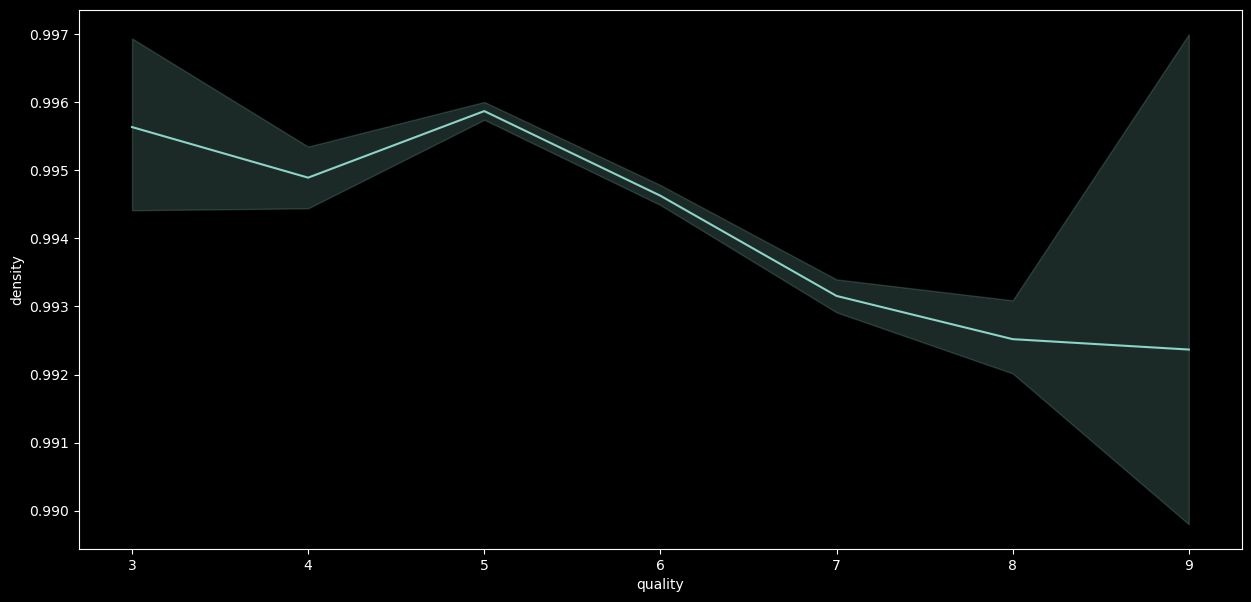

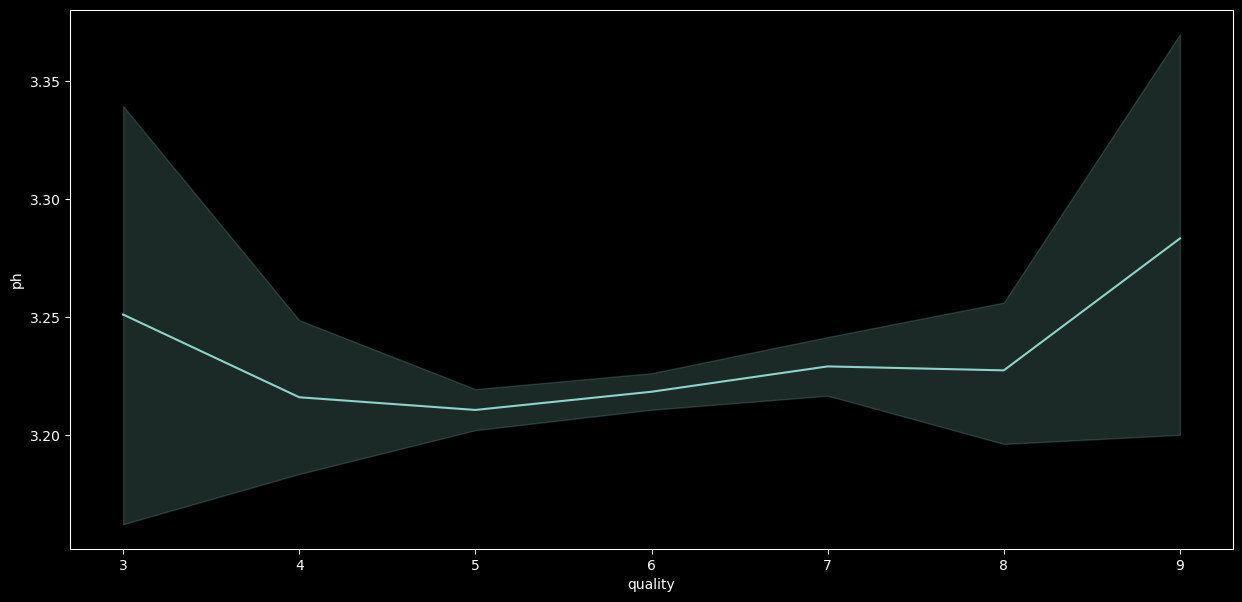

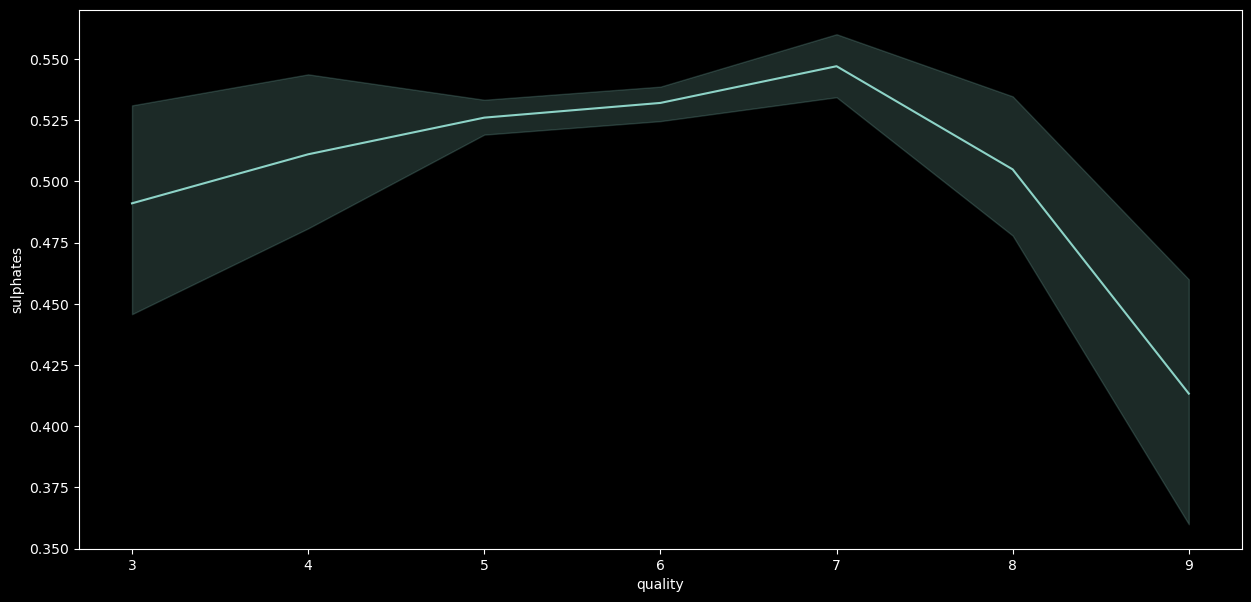

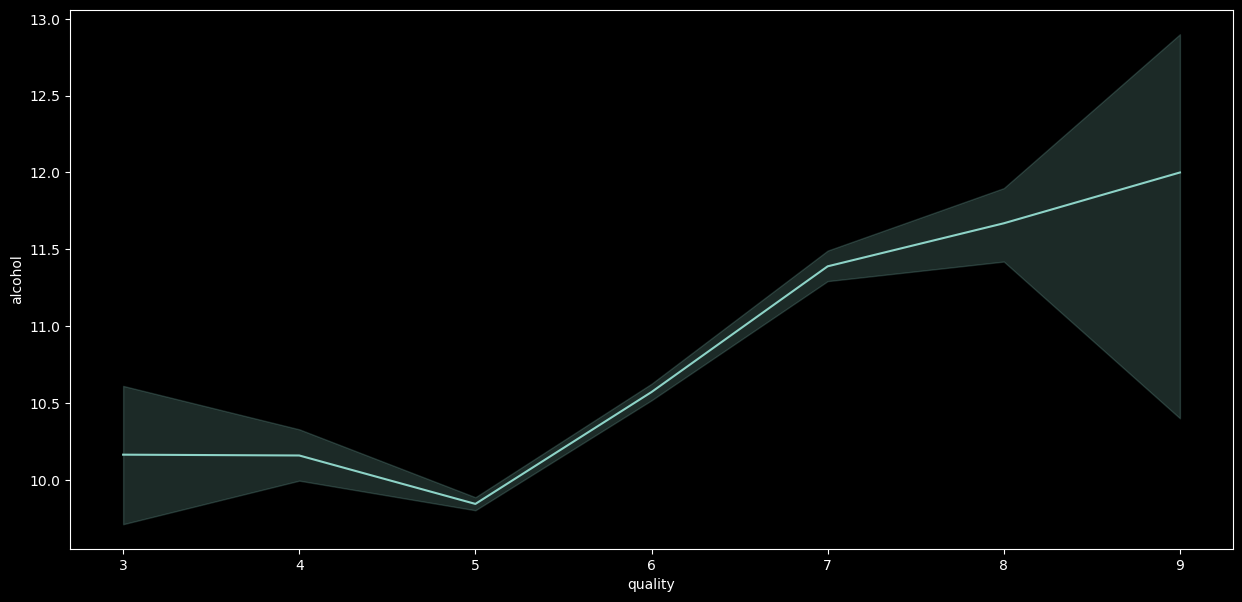

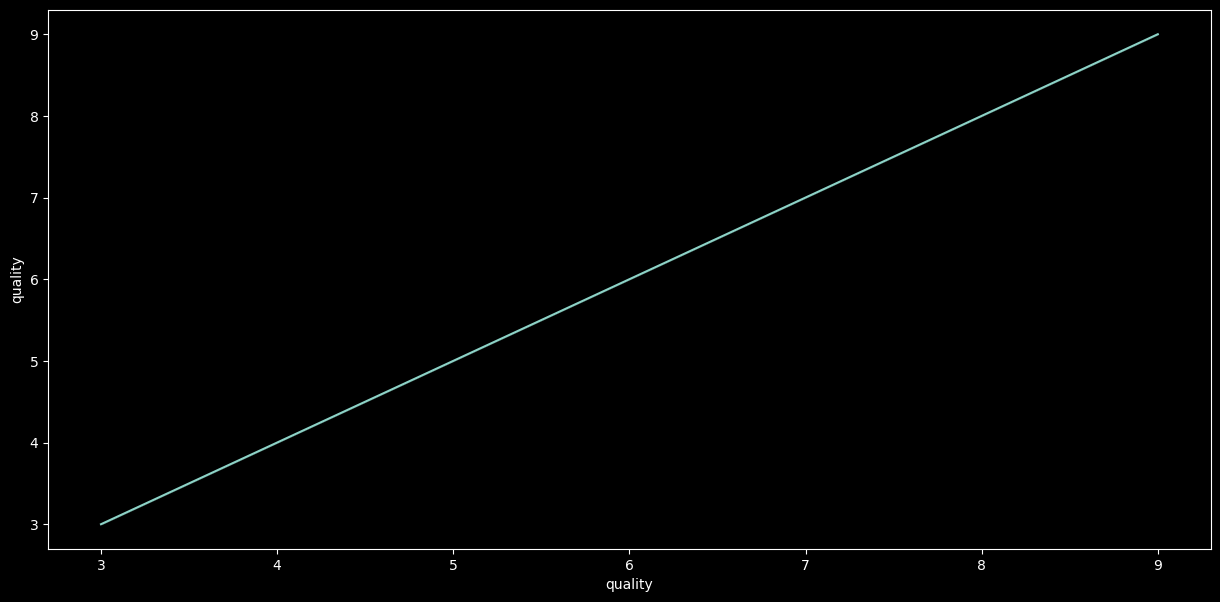

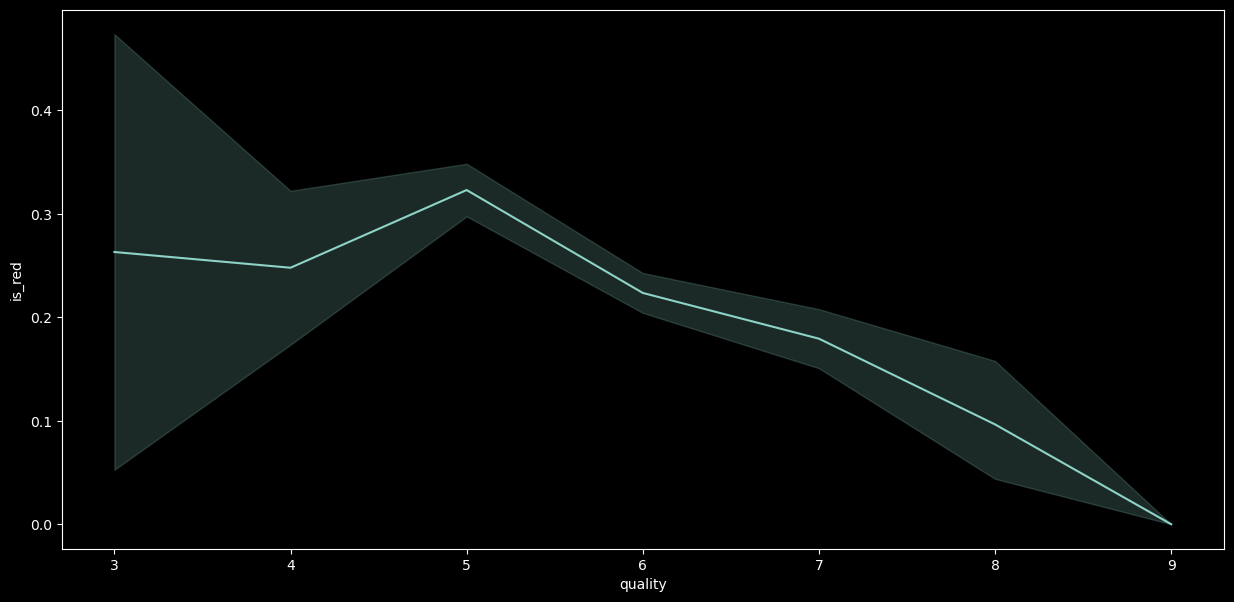

In [13]:
# Make a line plot for each column compared against quality
for col in train.columns:
    plt.figure(figsize=(15, 7))
    sns.lineplot(data=train, x="quality", y=col)

total_sulfur and free_sulfur_dioxide are obviously correlated

In [14]:
import plotly.express as px

# Create the scatter plot with animation
fig = px.scatter(
    df.sort_values("quality"),
    x="free_sulfur_dioxide",
    y="total_sulfur_dioxide",
    animation_frame="quality",
)

# Show the plot
fig.show()

- We have 5 types of quality in DataSet - 3 to 9
    - The Best quality 9
    - The Worst quality 3

- The elements highest effect on the quality of wine:
    - 1 - Alcohol 
    - 2 - Free sulfur dioxide
    - 3 - Total sulfur dioxide

- The elements with the least effect:
    - 1 - Fixed acidity
    - 2 - Volatile acidity
    - 3 - Citric acid
    - 4 - Residual sugar
    - 5 - Chlorides
    - 6 - Density
    - 7 - PH
    - 8 - Sulphates

### Stats

Since the predicted variable is categorical and the other variables are numerical, we will use the Mann-Whitney U-test. Afterwards, we will create a Spearman correlation matrix.

In [15]:
import pandas as pd
import scipy.stats

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=["feature_vs_quality", "test_statistic", "p_value"])

# Perform the Mann-Whitney U test for each feature
for feature in train.columns:
    u, p = scipy.stats.mannwhitneyu(train["quality"], train[feature])
    results_df.loc[len(results_df)] = [feature, u, p]

# Print the results DataFrame
results_df

,feature_vs_quality,test_statistic,p_value
0,fixed_acidity,2359532.0,0.000000e+00
1,volatile_acidity,15186609.0,0.000000e+00
2,citric_acid,15186609.0,0.000000e+00
3,residual_sugar,9558465.5,1.477977e-88
4,chlorides,15186609.0,0.000000e+00
5,free_sulfur_dioxide,702421.5,0.000000e+00
6,total_sulfur_dioxide,2034.0,0.000000e+00
7,density,15186609.0,0.000000e+00
8,ph,15118202.0,0.000000e+00
9,sulphates,15186609.0,0.000000e+00


In [16]:
correlation = train.corr()
print(correlation["quality"].sort_values(ascending=False), "\n")

quality                 1.000000
alcohol                 0.441685
citric_acid             0.074326
free_sulfur_dioxide     0.035215
sulphates               0.032785
ph                      0.032669
residual_sugar         -0.034809
total_sulfur_dioxide   -0.048878
fixed_acidity          -0.083737
is_red                 -0.123084
chlorides              -0.203839
volatile_acidity       -0.263994
density                -0.300926
Name: quality, dtype: float64 



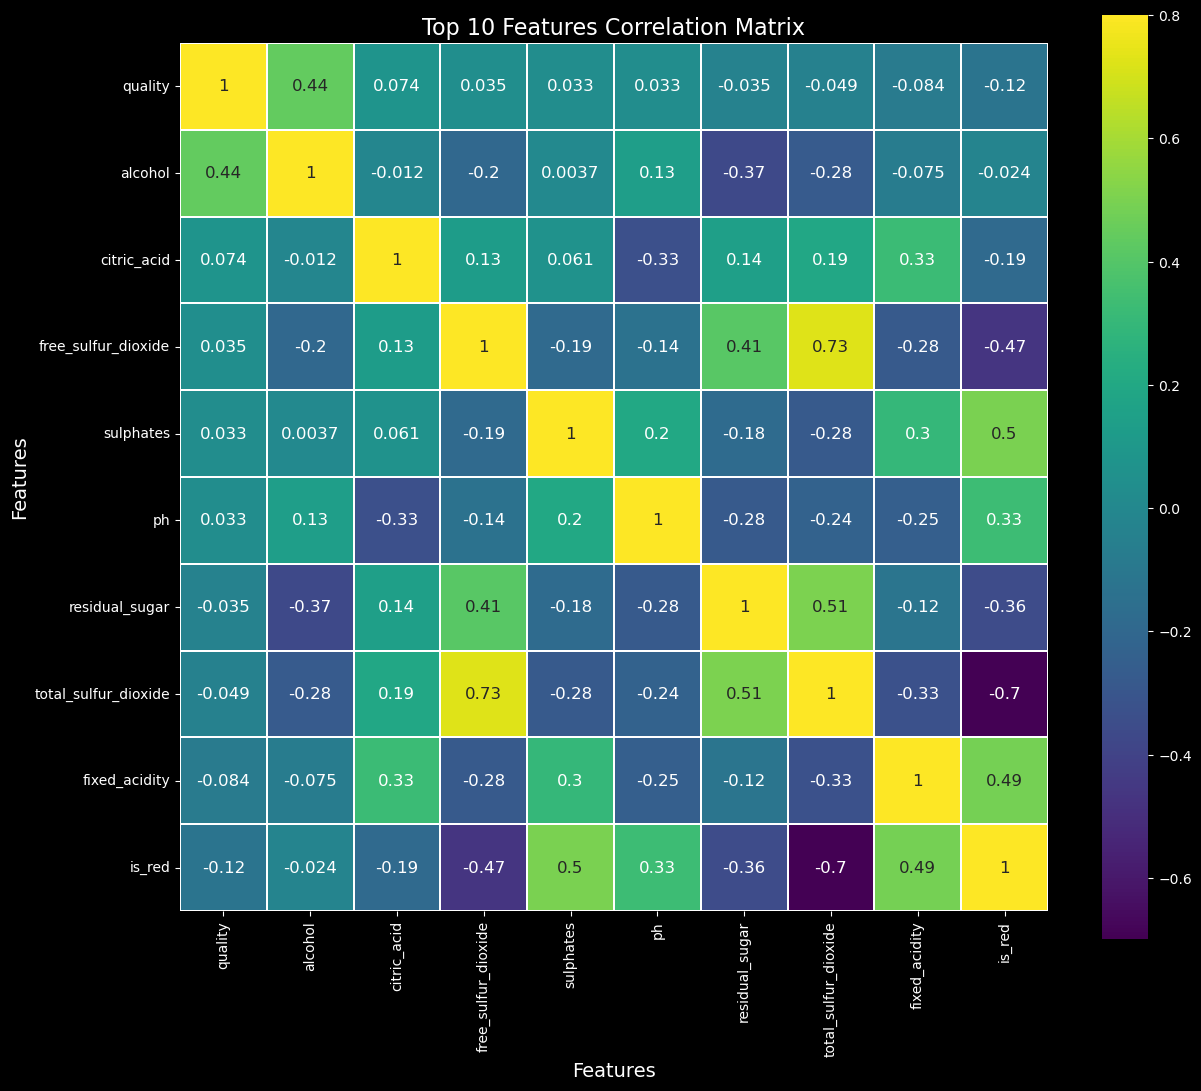

In [17]:
import numpy as np

# Select the top k features with highest correlation with quality
k = 10
cols = correlation.nlargest(k, "quality")["quality"].index

# Compute the correlation matrix for the selected features
cm = np.corrcoef(train[cols].values.T)

# Create a heatmap of the correlation matrix
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(
    cm,
    vmax=0.8,
    linewidths=0.01,
    square=True,
    annot=True,
    cmap="viridis",
    linecolor="white",
    xticklabels=cols.values,
    annot_kws={"size": 12},
    yticklabels=cols.values,
)

# Set the title and axis labels
ax.set_title(f"Top {k} Features Correlation Matrix", fontsize=16)
ax.set_xlabel("Features", fontsize=14)
ax.set_ylabel("Features", fontsize=14)

# Show the plot
plt.show()

### Split and Scale before KMeans

#### Split

In [18]:
# We'll do exploration and train our model on the train data
X_train = train.drop(columns=["quality"])
y_train = train["quality"]

# We tune our model on validate, since it will be out-of-sample until we use it.
X_validate = validate.drop(columns=["quality"])
y_validate = validate["quality"]

# Keep the test separate, for our final out-of-sample dataset, to see how well our tuned model performs on new data.
X_test = test.drop(columns=["quality"])
y_test = test["quality"]

#### Scale

##### Scaler Function

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


def multi_scaler(train, val, test, scaled_features=None, scaler="MM"):
    """
    This function takes in 3 dataframes (train, val, test)
    and scales them using the specified scaler.

    Parameters:
    train (pandas.DataFrame): The training dataframe.
    val (pandas.DataFrame): The validation dataframe.
    test (pandas.DataFrame): The test dataframe.
    scaled_features (list): A list of column names to scale. If None, all numeric columns are scaled.
    scaler (str): The scaler to use. Must be one of "MM" (MinMaxScaler), "Standard" (StandardScaler), or "Robust" (RobustScaler).

    Returns:
    tuple: A tuple of the scaled dataframes (train_scaled, val_scaled, test_scaled).
    """
    if scaled_features is None:
        # If scaled_features is not defined, scale all numeric columns
        numeric_cols = train.select_dtypes(include=["number"]).columns.to_list()
        if len(numeric_cols) == 0:
            raise ValueError("No numeric columns to scale.")
        scaled_features = numeric_cols

    if scaler == "MM":
        scaler_obj = MinMaxScaler()
    elif scaler == "Standard":
        scaler_obj = StandardScaler()
    elif scaler == "Robust":
        scaler_obj = RobustScaler()
    else:
        raise ValueError(
            "Invalid scaler. Must be one of 'MM', 'Standard', or 'Robust'."
        )

    # Fit the scaler on the training data
    scaler_obj.fit(train[scaled_features])
    train_scaled = train.copy()
    train_scaled[scaled_features] = scaler_obj.transform(train[scaled_features])

    # Transform
    val_scaled = val.copy()
    val_scaled[scaled_features] = scaler_obj.transform(val[scaled_features])

    # Transform
    test_scaled = test.copy()
    test_scaled[scaled_features] = scaler_obj.transform(test[scaled_features])

    return train_scaled, val_scaled, test_scaled

In [44]:
X_train_scaled_mm, X_validate_scaled_mm, X_test_scaled_mm = multi_scaler(X_train, X_validate, X_test, scaler='MM')

X_train_scaled_std, X_validate_scaled_std, X_test_scaled_std = multi_scaler(
    X_train, X_validate, X_test, scaler="Standard"
)

X_train_scaled_rob, X_validate_scaled_rob, X_test_scaled_rob = multi_scaler(X_train, X_validate, X_test, scaler='Robust')

### K Means Elbow for Feature Engineering

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings

warnings.filterwarnings("ignore")

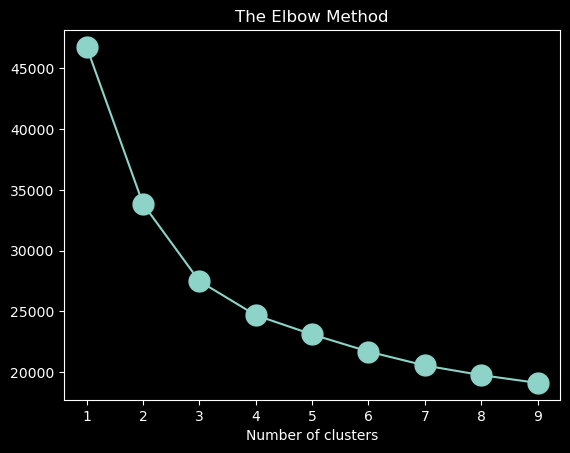

In [22]:
# Create an empty list to store the sum of squared distances for each number of clusters
elbow = []

# Iterate over the range of possible numbers of clusters
for i in range(1, 10):
    # Create a KMeans object with the current number of clusters
    kmeans = KMeans(n_clusters=i, random_state=123)

    # Fit the KMeans object to the training data
    kmeans.fit(X_train_scaled)

    # Append the sum of squared distances to the elbow list
    elbow.append(kmeans.inertia_)

# Create a line plot of the sum of squared distances for each number of clusters
plt.plot(range(1, 10), elbow, marker="o", markersize=15)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.show()

The silhouette score from SKLearn is a metric used to evaluate the quality of clustering. It measures how similar an object is to its own cluster compared to other clusters. The silhouette score ranges from -1 to 1, where a score of 1 indicates that the object is well-matched to its own cluster and poorly-matched to neighboring clusters, and a score of -1 indicates the opposite.

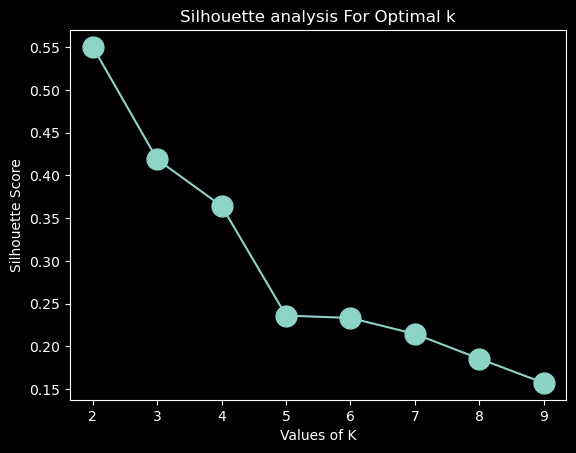

In [23]:
l1 = [2, 3, 4, 5, 6, 7, 8, 9]
silhouette_avg = []
for i in l1:
    kmeans = KMeans(n_clusters=i, random_state=123)
    kmeans.fit(X_train_scaled)
    cluster_labels = kmeans.labels_
    pca = PCA(n_components=i)
    reduced_X = pd.DataFrame(data=pca.fit_transform(X_train_scaled))
    silhouette_avg.append(silhouette_score(reduced_X, kmeans.labels_))


plt.plot(l1, silhouette_avg, marker="o", markersize=15)

plt.xlabel("Values of K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette analysis For Optimal k")
plt.show()

### ~~Developing PCA from SKLearn~~


PCA is like RFE, but for unsupervsied methods.

PCA is a technique for reducing the dimensionality of a dataset by identifying the most important features. It does this by transforming the original features into a new set of features called principal components, which capture the most important information in the data. The principal components are ordered by the amount of variance they explain, with the first component explaining the most variance and so on. PCA is an unsupervised technique, meaning it does not take into account the target variable.

In [24]:
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA

# # Create a KMeans object with 2 clusters and fit it to the standardized training data
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(X_train_scaled)

# # Get the cluster centers and labels
# centers = kmeans.cluster_centers_
# labels = kmeans.labels_

# # Create a PCA object with 2 components and fit it to the standardized training data
# pca = PCA(n_components=2)
# reduced_X = pd.DataFrame(
#     data=pca.fit_transform(X_train_scaled), columns=["PCA_1", "PCA_2"]
# )

# # Transform the cluster centers using the PCA object
# reduced_centers = pca.transform(centers)

# # Create a scatter plot of the reduced data with the cluster labels and centers
# plt.figure(figsize=(10, 5), dpi=300)
# plt.scatter(reduced_X["PCA_1"], reduced_X["PCA_2"], c=labels)
# plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], marker="x", s=300, c="red")
# plt.xlabel("PCA1")
# plt.ylabel("PCA2")
# plt.title("Cluster visualization\n")
# plt.tight_layout()

In [25]:
# # Add a Scree Plot to see how many PC to create

# from sklearn.decomposition import PCA

# pca = PCA(n_components=10)
# pca.fit(X_train_scaled)
# plt.plot(range(1, 11), pca.explained_variance_ratio_, marker="o", markersize=15)
# plt.title("The Scree Plot")
# plt.xlabel("Number of components")
# plt.ylabel("Explained variance ratio")
# plt.show()

In [26]:
# # Plot a Scree Plot as a bar graph showing PC variance

# # Plot a Scree Plot as a horizontal bar graph showing PC variance

# pca = PCA(n_components=10)
# pca.fit(X_train_scaled)
# plt.barh(range(1, 11), pca.explained_variance_ratio_)
# plt.yticks(range(1, 11))
# plt.title("The Scree Plot")
# plt.xlabel("Explained variance ratio")
# plt.ylabel("Number of components")

# # Rotate the graph 90 degrees
# plt.gca().invert_yaxis()

# plt.show()

In [27]:
# # Fit PCA on the data using determined correct components

# pca = PCA(n_components=5)
# X_train_pca = pca.fit_transform(X_train_scaled)
# X_validate_pca = pca.fit_transform(X_validate_scaled)
# X_test_pca = pca.fit_transform(X_test_scaled)

<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# Plan → Acquire → Prepare → Explore → <font color='white' size='20'><i>**Model**</i></font> → Deliver

- **Baseline predictions evaluated (2 pt)**

You made baseline predictions and evaluated the performance to measure your models against. Establishing a baseline prediction method that uses no features because it tells you if having a model has any value. If any model you build does not perform as well as a baseline that uses no features, then your features are not significant drivers of the outcome.

- **All models evaluated on train (2 pt)**

Models are always evaluated on train because it is a sample of data we have to see how the model performs. We should never skip straight to validate. We would be missing out on valuable observations.

- **Top models evaluated on validate (2 pt)**

Your top models are evaluated with the validate sample to check for overfitting.

**Eval metric(s) is clear and proper (2 pts)**

You identified what metric(s) you used to evaluate your models and why. If you considered multiple metrics, you explained how you selected a metric when one was better for model A and another is better for model B.

- **Final model evaluated on test (2 pts)**

Top model evaluated on test: we evaluate one last time on test in order to provide an estimate as to how we expect the model to perform in the future, in production, on data it has never seen.

- **Developed 4+ Unique Models (3 pts)**

You developed at least 4 unique models. Models can be different based on the features used, the hyperparameters selected, and/or the algorithm used to fit the data

---

### Model Loops

In [29]:
# Calculate the mean of prop_value in y_test and assign it to a new column named "baseline"
baseline = y_train[0].mean()
baseline

6.0

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


def cluster_and_model(X_train, y_train, X_validate, y_validate, n_clusters=5):
    """
    Clusters the data using KMeans with the given number of clusters, adds the cluster labels to the original data,
    and trains and evaluates RandomForestClassifier, KNeighborsClassifier, LogisticRegression, and DecisionTreeClassifier
    models on the data.

    Parameters:
    X_train (pandas.DataFrame): The training data to cluster and model.
    y_train (pandas.Series): The training target variable.
    X_validate (pandas.DataFrame): The validation data to cluster and model.
    y_validate (pandas.Series): The validation target variable.
    n_clusters (int): The number of clusters to use for KMeans clustering.

    Returns:
    scores_df (pandas.DataFrame): A DataFrame of classification reports for each model.
    """
    # Cluster the data using KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=123)
    kmeans.fit(X_train)
    X_train_clustered = kmeans.transform(X_train)
    X_validate_clustered = kmeans.transform(X_validate)

    # Add the cluster labels to the original data
    X_train_clustered_df = pd.DataFrame(
        X_train_clustered, columns=[f"cluster_{i}" for i in range(n_clusters)]
    )
    X_train_clustered_df.index = X_train.index
    X_train_clustered_df = pd.concat([X_train, X_train_clustered_df], axis=1)

    X_validate_clustered_df = pd.DataFrame(
        X_validate_clustered, columns=[f"cluster_{i}" for i in range(n_clusters)]
    )
    X_validate_clustered_df.index = X_validate.index
    X_validate_clustered_df = pd.concat([X_validate, X_validate_clustered_df], axis=1)

    # Train and evaluate models
    models = [
        RandomForestClassifier(),
        KNeighborsClassifier(),
        LogisticRegression(),
        DecisionTreeClassifier(),
    ]
    scores = dict()

    # Calculate the baseline accuracy
    baseline_acc = accuracy_score(y_train, [y_train[0].mean()] * len(y_train))

    for m in models:
        m.fit(X_train_clustered_df, y_train)
        y_train_pred = m.predict(X_train_clustered_df)
        y_validate_pred = m.predict(X_validate_clustered_df)

        report_train = classification_report(y_train, y_train_pred, output_dict=True)
        report_validate = classification_report(
            y_validate, y_validate_pred, output_dict=True
        )

        scores[str(m)] = {
            "acc_train": accuracy_score(y_train, y_train_pred),
            "acc_validate": accuracy_score(y_validate, y_validate_pred),
            "prec_train": report_train["weighted avg"]["precision"],
            "prec_validate": report_validate["weighted avg"]["precision"],
            "recall_train": report_train["weighted avg"]["recall"],
            "recall_validate": report_validate["weighted avg"]["recall"],
            "f1_train": report_train["weighted avg"]["f1-score"],
            "f1_validate": report_validate["weighted avg"]["f1-score"],
            "supp_train": report_train["weighted avg"]["support"],
            "supp_validate": report_validate["weighted avg"]["support"],
        }

    # Add the baseline accuracy to the scores dictionary
    scores["baseline"] = {"acc_train": baseline_acc, "acc_validate": baseline_acc}

    scores_df = pd.DataFrame(scores).transpose()
    scores_df.index.name = "Model"

    return scores_df

In [82]:
cluster_and_model(X_train_scaled_mm, y_train, X_validate_scaled_mm, y_validate, n_clusters=3)

,acc_train,acc_validate,prec_train,prec_validate,recall_train,recall_validate,f1_train,f1_validate,supp_train,supp_validate
Model,,,,,,,,,,
RandomForestClassifier(),1.000000,0.674615,1.000000,0.688684,1.000000,0.674615,1.000000,0.658765,3897.0,1300.0
KNeighborsClassifier(),0.693354,0.540769,0.689357,0.523873,0.693354,0.540769,0.684035,0.527634,3897.0,1300.0
LogisticRegression(),0.547344,0.526154,0.526323,0.483161,0.547344,0.526154,0.507932,0.487262,3897.0,1300.0
DecisionTreeClassifier(),1.000000,0.571538,1.000000,0.568187,1.000000,0.571538,1.000000,0.569822,3897.0,1300.0
baseline,0.439569,0.439569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
cluster_and_model(X_train_scaled_mm, y_train, X_validate_scaled_mm, y_validate, n_clusters=4)

,acc_train,acc_validate,prec_train,prec_validate,recall_train,recall_validate,f1_train,f1_validate,supp_train,supp_validate
Model,,,,,,,,,,
RandomForestClassifier(),1.000000,0.666923,1.000000,0.673770,1.000000,0.666923,1.000000,0.651726,3897.0,1300.0
KNeighborsClassifier(),0.692584,0.545385,0.688318,0.528096,0.692584,0.545385,0.683502,0.532142,3897.0,1300.0
LogisticRegression(),0.548884,0.526154,0.529524,0.480186,0.548884,0.526154,0.507555,0.485250,3897.0,1300.0
DecisionTreeClassifier(),1.000000,0.575385,1.000000,0.578816,1.000000,0.575385,1.000000,0.576401,3897.0,1300.0
baseline,0.439569,0.439569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
cluster_and_model(X_train_scaled_mm, y_train, X_validate_scaled_mm, y_validate, n_clusters=5)

,acc_train,acc_validate,prec_train,prec_validate,recall_train,recall_validate,f1_train,f1_validate,supp_train,supp_validate
Model,,,,,,,,,,
RandomForestClassifier(),1.000000,0.670769,1.000000,0.676269,1.000000,0.670769,1.000000,0.654963,3897.0,1300.0
KNeighborsClassifier(),0.690531,0.540769,0.686430,0.525053,0.690531,0.540769,0.681723,0.527554,3897.0,1300.0
LogisticRegression(),0.549140,0.527692,0.529804,0.483963,0.549140,0.527692,0.510793,0.489751,3897.0,1300.0
DecisionTreeClassifier(),1.000000,0.564615,1.000000,0.563756,1.000000,0.564615,1.000000,0.563850,3897.0,1300.0
baseline,0.439569,0.439569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
cluster_and_model(X_train_scaled_mm, y_train, X_validate_scaled_mm, y_validate, n_clusters=6)

,acc_train,acc_validate,prec_train,prec_validate,recall_train,recall_validate,f1_train,f1_validate,supp_train,supp_validate
Model,,,,,,,,,,
RandomForestClassifier(),1.000000,0.668462,1.000000,0.681440,1.000000,0.668462,1.000000,0.652947,3897.0,1300.0
KNeighborsClassifier(),0.686682,0.540769,0.682438,0.525686,0.686682,0.540769,0.677605,0.527906,3897.0,1300.0
LogisticRegression(),0.550423,0.532308,0.531487,0.487851,0.550423,0.532308,0.513680,0.495023,3897.0,1300.0
DecisionTreeClassifier(),1.000000,0.562308,1.000000,0.564312,1.000000,0.562308,1.000000,0.562671,3897.0,1300.0
baseline,0.439569,0.439569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
cluster_and_model(X_train_scaled_std, y_train, X_validate_scaled_std, y_validate, n_clusters=3)


,acc_train,acc_validate,prec_train,prec_validate,recall_train,recall_validate,f1_train,f1_validate,supp_train,supp_validate
Model,,,,,,,,,,
RandomForestClassifier(),1.000000,0.680769,1.000000,0.688395,1.000000,0.680769,1.000000,0.664978,3897.0,1300.0
KNeighborsClassifier(),0.689248,0.530769,0.685204,0.520068,0.689248,0.530769,0.679436,0.519418,3897.0,1300.0
LogisticRegression(),0.550423,0.533846,0.532159,0.525149,0.550423,0.533846,0.518151,0.500454,3897.0,1300.0
DecisionTreeClassifier(),1.000000,0.573846,1.000000,0.570994,1.000000,0.573846,1.000000,0.572255,3897.0,1300.0
baseline,0.439569,0.439569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
cluster_and_model(X_train_scaled_std, y_train, X_validate_scaled_std, y_validate, n_clusters=4)


,acc_train,acc_validate,prec_train,prec_validate,recall_train,recall_validate,f1_train,f1_validate,supp_train,supp_validate
Model,,,,,,,,,,
RandomForestClassifier(),1.000000,0.660000,1.000000,0.662800,1.000000,0.660000,1.000000,0.645597,3897.0,1300.0
KNeighborsClassifier(),0.690018,0.534615,0.686209,0.516087,0.690018,0.534615,0.679824,0.521099,3897.0,1300.0
LogisticRegression(),0.554016,0.536154,0.536962,0.527261,0.554016,0.536154,0.523224,0.503692,3897.0,1300.0
DecisionTreeClassifier(),1.000000,0.571538,1.000000,0.566574,1.000000,0.571538,1.000000,0.568936,3897.0,1300.0
baseline,0.439569,0.439569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
cluster_and_model(X_train_scaled_std, y_train, X_validate_scaled_std, y_validate, n_clusters=5)


,acc_train,acc_validate,prec_train,prec_validate,recall_train,recall_validate,f1_train,f1_validate,supp_train,supp_validate
Model,,,,,,,,,,
RandomForestClassifier(),1.000000,0.650769,1.000000,0.658836,1.000000,0.650769,1.000000,0.636407,3897.0,1300.0
KNeighborsClassifier(),0.693610,0.535385,0.688311,0.517546,0.693610,0.535385,0.683278,0.521846,3897.0,1300.0
LogisticRegression(),0.550937,0.536923,0.532810,0.528856,0.550937,0.536923,0.524065,0.508021,3897.0,1300.0
DecisionTreeClassifier(),1.000000,0.569231,1.000000,0.565692,1.000000,0.569231,1.000000,0.567442,3897.0,1300.0
baseline,0.439569,0.439569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
cluster_and_model(X_train_scaled_std, y_train, X_validate_scaled_std, y_validate, n_clusters=6)

,acc_train,acc_validate,prec_train,prec_validate,recall_train,recall_validate,f1_train,f1_validate,supp_train,supp_validate
Model,,,,,,,,,,
RandomForestClassifier(),1.000000,0.656154,1.000000,0.664282,1.000000,0.656154,1.000000,0.640237,3897.0,1300.0
KNeighborsClassifier(),0.690275,0.537692,0.685013,0.520957,0.690275,0.537692,0.680282,0.525388,3897.0,1300.0
LogisticRegression(),0.550423,0.534615,0.527171,0.525477,0.550423,0.534615,0.522273,0.504115,3897.0,1300.0
DecisionTreeClassifier(),1.000000,0.576923,1.000000,0.573705,1.000000,0.576923,1.000000,0.574926,3897.0,1300.0
baseline,0.439569,0.439569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
cluster_and_model(X_train_scaled_rob, y_train, X_validate_scaled_rob, y_validate, n_clusters=3)


,acc_train,acc_validate,prec_train,prec_validate,recall_train,recall_validate,f1_train,f1_validate,supp_train,supp_validate
Model,,,,,,,,,,
RandomForestClassifier(),1.000000,0.681538,1.000000,0.698325,1.000000,0.681538,1.000000,0.664854,3897.0,1300.0
KNeighborsClassifier(),0.695663,0.543077,0.690714,0.525371,0.695663,0.543077,0.685101,0.528588,3897.0,1300.0
LogisticRegression(),0.551193,0.530000,0.529609,0.511046,0.551193,0.530000,0.518584,0.497262,3897.0,1300.0
DecisionTreeClassifier(),1.000000,0.575385,1.000000,0.575787,1.000000,0.575385,1.000000,0.575551,3897.0,1300.0
baseline,0.439569,0.439569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
cluster_and_model(X_train_scaled_rob, y_train, X_validate_scaled_rob, y_validate, n_clusters=4)


,acc_train,acc_validate,prec_train,prec_validate,recall_train,recall_validate,f1_train,f1_validate,supp_train,supp_validate
Model,,,,,,,,,,
RandomForestClassifier(),1.000000,0.680000,1.000000,0.687830,1.000000,0.680000,1.000000,0.664356,3897.0,1300.0
KNeighborsClassifier(),0.692327,0.548462,0.687393,0.532621,0.692327,0.548462,0.681692,0.534396,3897.0,1300.0
LogisticRegression(),0.551963,0.532308,0.545260,0.512428,0.551963,0.532308,0.520157,0.498139,3897.0,1300.0
DecisionTreeClassifier(),1.000000,0.579231,1.000000,0.575735,1.000000,0.579231,1.000000,0.577069,3897.0,1300.0
baseline,0.439569,0.439569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
cluster_and_model(X_train_scaled_rob, y_train, X_validate_scaled_rob, y_validate, n_clusters=5)


,acc_train,acc_validate,prec_train,prec_validate,recall_train,recall_validate,f1_train,f1_validate,supp_train,supp_validate
Model,,,,,,,,,,
RandomForestClassifier(),1.000000,0.674615,1.000000,0.689218,1.000000,0.674615,1.000000,0.658527,3897.0,1300.0
KNeighborsClassifier(),0.694637,0.555385,0.689294,0.541019,0.694637,0.555385,0.683547,0.541513,3897.0,1300.0
LogisticRegression(),0.552989,0.533077,0.528000,0.524476,0.552989,0.533077,0.519041,0.497357,3897.0,1300.0
DecisionTreeClassifier(),1.000000,0.580000,1.000000,0.578292,1.000000,0.580000,1.000000,0.578775,3897.0,1300.0
baseline,0.439569,0.439569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
cluster_and_model(X_train_scaled_rob, y_train, X_validate_scaled_rob, y_validate, n_clusters=6)

,acc_train,acc_validate,prec_train,prec_validate,recall_train,recall_validate,f1_train,f1_validate,supp_train,supp_validate
Model,,,,,,,,,,
RandomForestClassifier(),1.000000,0.671538,1.000000,0.684978,1.000000,0.671538,1.000000,0.655083,3897.0,1300.0
KNeighborsClassifier(),0.697203,0.551538,0.691607,0.534750,0.697203,0.551538,0.686156,0.537403,3897.0,1300.0
LogisticRegression(),0.553759,0.535385,0.529978,0.526049,0.553759,0.535385,0.521659,0.499731,3897.0,1300.0
DecisionTreeClassifier(),1.000000,0.576154,1.000000,0.576274,1.000000,0.576154,1.000000,0.575801,3897.0,1300.0
baseline,0.439569,0.439569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Test Model

In [94]:
cluster_and_model(X_train_scaled_rob, y_train, X_test_scaled_rob, y_test, n_clusters=3)

,acc_train,acc_validate,prec_train,prec_validate,recall_train,recall_validate,f1_train,f1_validate,supp_train,supp_validate
Model,,,,,,,,,,
RandomForestClassifier(),1.000000,0.670769,1.000000,0.690871,1.000000,0.670769,1.000000,0.652786,3897.0,1300.0
KNeighborsClassifier(),0.695663,0.556154,0.690714,0.541491,0.695663,0.556154,0.685101,0.542392,3897.0,1300.0
LogisticRegression(),0.550937,0.532308,0.529362,0.517629,0.550937,0.532308,0.518357,0.493940,3897.0,1300.0
DecisionTreeClassifier(),1.000000,0.560769,1.000000,0.559674,1.000000,0.560769,1.000000,0.559508,3897.0,1300.0
baseline,0.439569,0.439569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

# Plan → Acquire → Prepare → Explore → Model → <font color='white' size='20'><i>**Deliver**</i></font>

- **Adequate comments (6 pts)**

Your code contains code comments that are helpful to the reader in understanding what your blocks/lines of code are doing.

- **Adequate md documentation (6 pts)**

Notebook contains adequate markdown that documents your thought process, navigating through the pipeline. This helps your reader not get lost in the details.

- **Includes summary (2 pts)**

Your conclusion summary addresses the questions you raised in the opening of the project, which we would want to see at the end of every report notebook. Ideally, when the deliverable is a report such as this, the summary should tie together your analysis, the drivers of the outcome, and how you would expect your ML model to perform in the future on unseen data, in layman's terms.

- **Includes recommendations (2 pts)**

In addition to your summary, you included actionable recommendations based on your insights and analysis to your simulated audience, or someone who would find this information valuable. Your recommendations were not about what to do differently with the data, but instead are based on the business or domain you are studying. Nice work.

- **Includes next steps (2 pts)**

Your conclusion includes next steps from a data science perspective that will assist in improving your research. Ideally, if you talk about trying more algorithms to improve performance, think about why you need to improve performance. And if the business calls for it, remember the best way to improve performance is to have better predictors/features. If you talk about gathering more data, being specific about what data you think will help you understand the problem better and why is the way to go!

- **No Errors (5 pts)**

Your final notebook runs without error.

---

<div style="background-color: #006aff; padding: 10px; color: #18C0C4;">

<font color='white' size='20'><i>**Markdown**</i>

- **Includes the project 'How' (2 pts)**

Your readme includes a project plan which helps guide both the user and yourself through the different stages of the pipeline and steps you took to get to your conclusion

- **Includes complete data dictionary (2 pts)**

Your readme includes a complete and accurate data dictionary

- **Goals include what and why (2 pts)**

You stated clear and concise project goals and included the 'so what'.

- **Complete instructions to reproduce (2 pts)**

Reproducible with ease!

- **Project description provides context. (2 pts)**

Project description provides context and explains the 'whys' to your project. It is NOT a copy of the class project spec.

- **Initial questions, areas of focus for exploration are discussed (2 pts)**

In your readme, you discussed the initial questions and focus you are going into the analysis with.